In [115]:
#==============================================================================
# Import libraries
#==============================================================================
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [117]:
#==============================================================================
# imort the dataset of flat prices
#==============================================================================

flatdata = pd.read_csv ('C:\ML SimpliLearn\Project\Machine_Learning_Projects\housing.csv')
X = flatdata.iloc [:,0:9].values
y = flatdata.iloc [:,9].values
print(X)
print(y)


[[-122.23 37.88 41 ..., 126 8.3252 'NEAR BAY']
 [-122.22 37.86 21 ..., 1138 8.3014 'NEAR BAY']
 [-122.24 37.85 52 ..., 177 7.2574 'NEAR BAY']
 ..., 
 [-121.22 39.43 17 ..., 433 1.7 'INLAND']
 [-121.32 39.43 18 ..., 349 1.8672 'INLAND']
 [-121.24 39.37 16 ..., 530 2.3886 'INLAND']]
[452600 358500 352100 ...,  92300  84700  89400]


In [119]:
#Bonus Problem Creating Data from Med Income
X_bonus = flatdata.iloc[:,7:8].values

y_bonus = flatdata.iloc[:,9].values


In [120]:
print(X_bonus)
print(y_bonus)

[[ 8.3252]
 [ 8.3014]
 [ 7.2574]
 ..., 
 [ 1.7   ]
 [ 1.8672]
 [ 2.3886]]
[452600 358500 352100 ...,  92300  84700  89400]


In [95]:
from sklearn.preprocessing import Imputer
imputer = Imputer(missing_values = "NaN", strategy = "mean", axis = 0)
X[:,4:5] = imputer.fit_transform(X[:, 4:5])
X[:, 4:5]

array([[129.0],
       [1106.0],
       [190.0],
       ..., 
       [485.0],
       [409.0],
       [616.0]], dtype=object)

In [96]:
from sklearn.preprocessing import LabelEncoder
lbl = LabelEncoder()
print(X[:, 8])
X[:, 8] = lbl.fit_transform(X[:, 8])
X[:, 8]


['NEAR BAY' 'NEAR BAY' 'NEAR BAY' ..., 'INLAND' 'INLAND' 'INLAND']


array([3, 3, 3, ..., 1, 1, 1], dtype=object)

In [101]:
#==============================================================================
# split the dataset into training and test set. We will use 80/20 approach
#==============================================================================

from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size = 1/5, 
                                                     random_state = 0)

array([], shape=(4128, 0), dtype=object)

array([[ 0.14448941],
       [ 0.99820424],
       [ 0.24775544],
       ..., 
       [-0.35327491],
       [ 1.18910742],
       [-0.28514765]])

In [112]:
med_inc_test


array([ 0.14448941,  0.99820424,  0.24775544, ..., -0.35327491,
        1.18910742, -0.28514765])

In [105]:
from sklearn.preprocessing import StandardScaler
scl = StandardScaler()
X_train = scl.fit_transform(X_train)
X_test = scl.transform(X_test)


C:\Users\sony\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [55]:
#==============================================================================
# Fitting the Linear Regression algo to the Training set
#==============================================================================

from sklearn.linear_model import LinearRegression
regressoragent = LinearRegression()
regressoragent.fit (X_train, y_train )  

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [56]:
predictLinR = regressoragent.predict(X_test)
predictLinR

array([ 210776.44901247,  279878.4567539 ,  190478.34412314, ...,
         80625.22422957,  279916.99817768,  207126.99095493])

In [59]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rms = sqrt(mean_squared_error(y_test, predictLinR))
rms

69826.89013012727

In [61]:
from sklearn.tree import DecisionTreeRegressor
DTReg = DecisionTreeRegressor(random_state = 0)
DTReg.fit(X_train, y_train )

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=0, splitter='best')

In [63]:
predictDT = DTReg.predict(X_test)
predictDT

array([ 134800.,  267600.,  160300., ...,  120100.,  250300.,  173900.])

In [65]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmsDT = sqrt(mean_squared_error(y_test, predictDT))
rmsDT

67116.265343338

In [76]:
from sklearn.ensemble import RandomForestRegressor
RFregressor = RandomForestRegressor(n_estimators = 100,  random_state=0)
RFregressor.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [77]:
#==============================================================================
# Now check what our model learned by predicting the X_test values
#==============================================================================

predictRF = RFregressor.predict(X_test)
predictRF

array([ 140826.  ,  248949.01,  142108.  , ...,  157586.  ,  221279.  ,
        188139.  ])

In [79]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmsRF = sqrt(mean_squared_error(y_test, predictRF))
rmsRF

48819.290854349296

In [80]:
score = regressoragent.score(X_test, y_test)
score

0.62607644048200073

In [81]:
score = DTReg.score(X_test, y_test)
score

0.65454379858990419

In [84]:
score = RFregressor.score(X_test, y_test)
score

0.81722349789163073

array([ 0.19001247,  0.26931072,  0.02989505, ..., -0.35589721,
        0.92053182, -1.30490629])

In [121]:
#Bonus
#==============================================================================
# split the dataset into training and test set. We will use 80/20 approach
#==============================================================================

from sklearn.cross_validation import train_test_split
X_bonus_train, X_bonus_test, y_bonus_train, y_bonus_test = train_test_split (X_bonus, y_bonus, test_size = 1/5, 
                                                     random_state = 0) 

In [123]:
#==============================================================================
# Bonus - Fitting the Linear Regression algo to the Training set
#==============================================================================

from sklearn.linear_model import LinearRegression
linRegBonus = LinearRegression()
linRegBonus.fit (X_bonus_train, y_bonus_train )

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [125]:
predictBonusLinR = linRegBonus.predict(X_bonus_test)
predictBonusLinR

array([ 218829.83059812,  287249.80945645,  227105.96638704, ...,
        178937.09074405,  302549.52213887,  184397.07062714])

In [127]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmsBonus = sqrt(mean_squared_error(y_bonus_test, predictBonusLinR))
rmsBonus

84941.05152406936

In [ ]:
score = regressoragent.score(X_test, y_test)
score

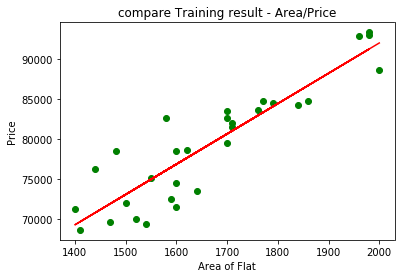

In [7]:
#==============================================================================
# So now let us visualize the Training set
#==============================================================================
plt.scatter(X_train, y_train, color = 'green')
plt.plot (X_train, regressoragent.predict (X_train), color = 'red')
plt.title ('compare Training result - Area/Price')
plt.xlabel('Area of Flat')
plt.ylabel('Price')
plt.show()

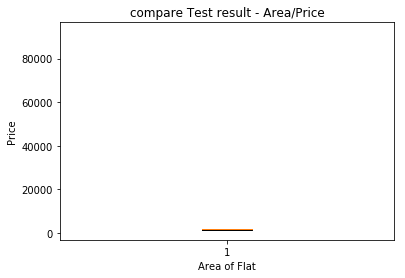

In [44]:
#==============================================================================
# So now let us visualize the Test set
#==============================================================================
plt.scatter(X_test, y_test, color = 'green')
plt.plot (X_train, regressoragent.predict (X_train), color = 'red')
plt.title ('compare Test result - Area/Price')
plt.xlabel('Area of Flat')
plt.ylabel('Price')
plt.show()

In [46]:
print(regressoragent.coef_)
print(regressoragent.intercept_)

[ 37.71678375]
16531.3604154


In [12]:
predictValues_new = regressoragent.predict([[1700], [1900]])
print (predictValues_new)

[ 80649.89279169  88193.24954184]


In [39]:
np.mean(X_train)


1666.6666666666667

In [40]:
np.mean(y_train)

79392.666666666672

In [41]:
np.median(X_train)

1630.0

In [42]:
np.median(y_train)

79100.0

In [43]:
from scipy.stats import mode
modeX=mode(X_train)
modey=mode(y_train)
print(modeX)
print(modey)


ModeResult(mode=array([[1600]], dtype=int64), count=array([[3]]))
ModeResult(mode=array([78500], dtype=int64), count=array([2]))


In [38]:
plt.boxplot(X)

{'boxes': [<matplotlib.lines.Line2D at 0xc8d0160>],
 'caps': [<matplotlib.lines.Line2D at 0xc8d0ba8>,
 'fliers': [<matplotlib.lines.Line2D at 0xc801908>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0xc801ac8>],
 'whiskers': [<matplotlib.lines.Line2D at 0xc8d02b0>,
  <matplotlib.lines.Line2D at 0xc8d0748>]}